In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline 

In [10]:
df=pd.read_excel('Semestr2.xlsx', sheet_name='for_python2') 
df.sample(5) 

,Unnamed: 0,"Индекс потребительских цен, 2010 г.=100",Расходы на конечное потребление на душу населения в долл. США,"Внешний баланс товаров и услуг, % от ВВП","Экспорт товаров и услуг, доля в процентах от ВВП","Импорт товаров и услуг, доля в процентах от ВВП","Обменный курс, единиц национальной валюты за долл. США","Уровень безработицы, %","ВВП на душу населения в ценах и ППС(США) 2010 г., темп роста"
22,Лихтенштейн,101.3,88004.9,11.7,62.2,50.5,0.9625,2.4,-0.6
28,Португалия,107.0,27018.5,0.7,40.6,39.9,0.9017,13.0,2.2
7,Болгария,106.6,16294.6,0.9,63.8,62.9,1.7635,10.1,4.1
31,Румыния,114.2,21163.9,-0.8,41.3,42.2,4.0080,8.4,3.7
16,Италия,107.5,33176.1,3.0,29.7,26.7,0.9017,12.0,0.9


In [11]:
df.columns

Index(['Unnamed: 0', 'Индекс потребительских цен, 2010 г.=100',
       'Расходы на конечное потребление на душу населения в долл. США ',
       'Внешний баланс товаров и услуг, % от ВВП',
       'Экспорт товаров и услуг, доля в процентах от ВВП',
       'Импорт товаров и услуг, доля в процентах от ВВП',
       'Обменный курс, единиц национальной валюты за долл. США',
       'Уровень безработицы, %',
       'ВВП на душу населения в ценах и ППС(США) 2010 г., темп роста'],
      dtype='object')

In [12]:
col=['Индекс потребительских цен, 2010 г.=100',
       'Расходы на конечное потребление на душу населения в долл. США ',
       'Внешний баланс товаров и услуг, % от ВВП',
       'Экспорт товаров и услуг, доля в процентах от ВВП',
       'Импорт товаров и услуг, доля в процентах от ВВП',
       'Обменный курс, единиц национальной валюты за долл. США',
       'Уровень безработицы, %',
       'ВВП на душу населения в ценах и ППС(США) 2010 г., темп роста']
      

In [13]:
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [14]:
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')

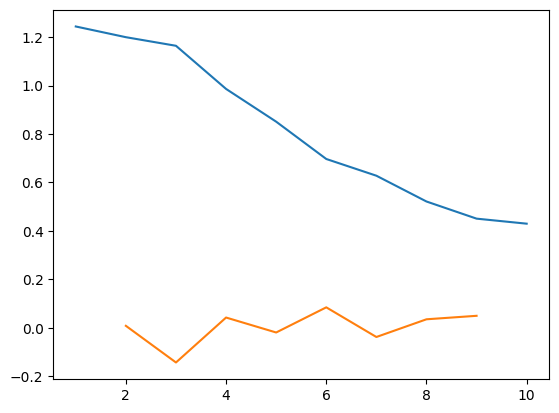

Рекомендованное количество кластеров: 6


In [15]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [16]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [17]:
nClust=6

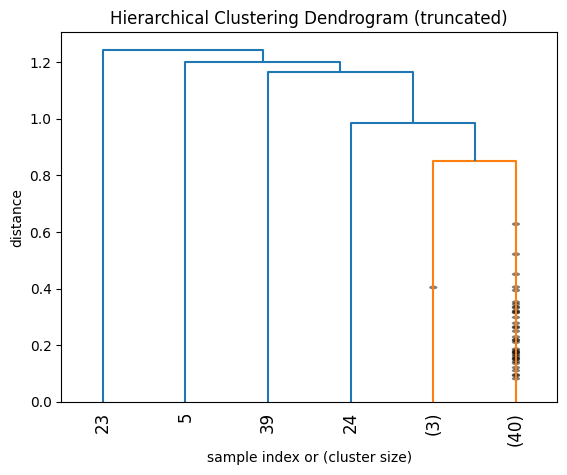

In [18]:
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [19]:
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, 1, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

In [20]:
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res 

,"Индекс потребительских цен, 2010 г.=100",Расходы на конечное потребление на душу населения в долл. США,"Внешний баланс товаров и услуг, % от ВВП","Экспорт товаров и услуг, доля в процентах от ВВП","Импорт товаров и услуг, доля в процентах от ВВП","Обменный курс, единиц национальной валюты за долл. США","Уровень безработицы, %","ВВП на душу населения в ценах и ППС(США) 2010 г., темп роста",Количество
I,,,,,,,,,
1,126.4000,13133.533333,-33.00,14.933333,47.933333,8.627767,3.633333,0.666667,3
2,112.1275,28720.837500,1.45,48.850000,47.402500,37.501685,9.697500,2.171000,40
3,103.5000,145942.300000,-0.60,30.600000,31.200000,0.901700,2.000000,3.200000,1
4,171.2000,5329.700000,-3.20,13.800000,17.000000,2570.939900,5.200000,2.000000,1
5,387.1000,12856.600000,0.10,58.000000,57.900000,1.592600,5.200000,-3.700000,1
6,108.2000,26098.800000,9.80,154.600000,144.900000,0.901700,5.400000,7.000000,1


In [22]:
display(df)

,Unnamed: 0,"Индекс потребительских цен, 2010 г.=100",Расходы на конечное потребление на душу населения в долл. США,"Внешний баланс товаров и услуг, % от ВВП","Экспорт товаров и услуг, доля в процентах от ВВП","Импорт товаров и услуг, доля в процентах от ВВП","Обменный курс, единиц национальной валюты за долл. США","Уровень безработицы, %","ВВП на душу населения в ценах и ППС(США) 2010 г., темп роста",I
0,Австрия,110.7,39014.7,3.8,53.1,49.3,0.9017,6.1,0.00,2
1,Азербайджан,117.7,9733.6,3.0,37.8,34.8,1.0246,5.0,-0.10,2
2,Албания,111.4,11637.3,-17.3,27.2,44.5,125.9617,17.1,2.50,2
3,Андорра,103.3,27383.9,-43.3,3.2,46.5,0.9017,3.6,-0.20,1
4,Армения,124.8,11058.2,-12.2,29.7,42.0,477.9183,18.5,3.60,2
5,Беларусь,387.1,12856.6,0.1,58.0,57.9,1.5926,5.2,-3.70,5
6,Бельгия,108.6,37582.5,1.4,77.8,76.4,0.9017,8.7,1.50,2
7,Болгария,106.6,16294.6,0.9,63.8,62.9,1.7635,10.1,4.10,2
8,Венгрия,111.4,20731.7,7.7,87.5,79.8,279.3790,6.6,4.00,2
9,Германия,107.2,38184.5,7.6,46.9,39.3,0.9017,4.6,0.60,2
